In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import sklearn
from math import *
from prettytable import PrettyTable
from functools import partial
from decimal import Decimal

plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]  # 黑体
plt.rcParams["axes.unicode_minus"] = False  # 解决无法显示符号的问题
palette = "deep"
sns.set(font="Microsoft YaHei", font_scale=1, palette=palette)  # 解决Seaborn中文显示问题

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |  100   | 1.26229E-01 | 7.59077E-01 | 4.95138E-01 | 1.26229E-01 | 7.13976E-02 
 1 |  200   | 1.26229E-01 | 4.99617E-01 | 4.61724E-01 | 1.26229E-01 | 8.01545E-02 
 2 |  300   | 1.26229E-01 | 4.95359E-01 | 4.25120E-01 | 1.26229E-01 | 1.00827E-01 
 3 |  400   | 1.21151E-01 | 4.81971E-01 | 3.70495E-01 | 1.21151E-01 | 1.11630E-01 
 4 |  500   | 1.21107E-01 | 4.02564E-01 | 2.88322E-01 | 1.21107E-01 | 9.40484E-02 
 5 |  600   | 2.51861E-02 | 3.42575E-01 | 2.17484E-01 | 2.51861E-02 | 7.49131E-02 
 6 |  700   | 2.51861E-02 | 2.24393E-01 | 1.50322E-01 | 2.51861E-02 | 3.80326E-02 
 7 |  800   | 1.16998E-02 | 1.46239E-01 | 1.17647E-01 | 1.16998E-02 | 2.97354E-02 
 8 |  900   | 1.16085E-02 | 1.30072E-01 | 1.00466E-01 | 1.16085E-02 | 3.71402E-02 
 9 |  1000  | 1.03752E-02 | 1.21425E-01 | 7.94138E-02 | 1.03752E-02 | 4.02344E-02 
 10|

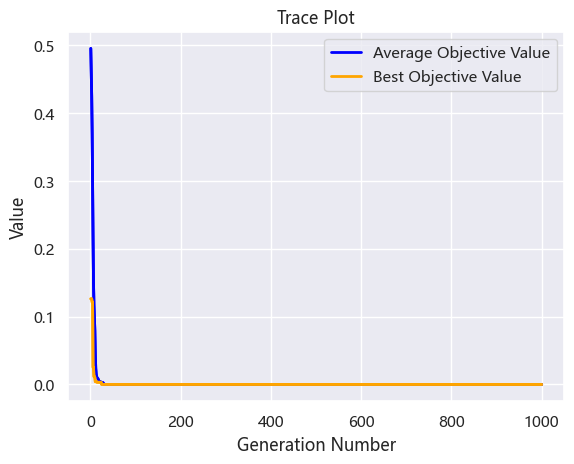

Execution time: 1.0700957775115967 s
Evaluation number: 100000
The best objective value is: 4.905631456608717e-12
The best variables are: 
6.966292858123779e-05	-7.264316082000732e-06	


In [2]:
import geatpy as ea
import numpy as np


def schaffer(p):
    """
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    """
    x1, x2 = p
    part1 = np.square(x1) - np.square(x2)
    part2 = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(part1)) - 0.5) / np.square(1 + 0.001 * part2)


# 构建问题
r = 1  # 目标函数需要用到的额外数据


@ea.Problem.single
def evalVars(Vars):  # 定义目标函数（含约束）
    f = schaffer(Vars)  # 计算目标函数值
    CV = np.array([])  # 计算违反约束程度
    return f, CV


problem = ea.Problem(
    name="soea quick start demo",
    M=1,  # 目标维数
    maxormins=[1],  # 目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标
    Dim=2,  # 决策变量维数
    varTypes=[0, 0],  # 决策变量的类型列表，0：实数；1：整数
    lb=[-100, -100],  # 决策变量下界
    ub=[100, 100],  # 决策变量上界
    evalVars=evalVars,
)
# 构建算法
algorithm = ea.soea_SEGA_templet(
    problem,
    ea.Population(Encoding="RI", NIND=100),
    MAXGEN=1000,  # 最大进化代数。
    logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
    maxTrappedCount=10,  # 进化停滞计数器最大上限值。
)

# 求解
res = ea.optimize(
    algorithm,
    seed=1,
    verbose=True,
    drawing=1,
    outputMsg=True,
    drawLog=False,
    saveFlag=True,
    dirName="result",
)